# Santander Customer Transaction Prediction Dataset

<br>

Fuente de datos:
https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset


Equipo de trabajo: 

    - Breitman, Zarina Madelaine   
    - Marinella, Santiago   
    - Navarro Quantín, Denise   
    - Ramos, Mateo    
    - Varela, Luis Gabriel


<br>

# Objetivo

Los datos con los que trabajaremos provienen de un dataset del banco Santander. El banco Santander busca entender mejor a sus clientes, de forma tal que pueda ofrecerles los productos que les permitan alcanzar sus metas financieras. Es por ello que con este dataset el banco tiene como objetivo el predecir cuáles son los clientes que van a realizar una determinada transacción en el futuro, independientemente del monto de dicha transacción. 

El dataset ya fue procesado con anterioridad. Es por ello que no podemos ver el significado de cada una de las variables, a excepción de la target que adopta los valores 0 y 1, que implica que el cliente no ha realizado o sí ha realizado una determinada transacción, respectivamente. Cabe destacar que, aunque no tengamos interpretabilidad de las variables, de igual modo se podrá confeccionar un algoritmo que permita predecir la variable target. 


<br>

# Dataset

In [7]:
# Importamos las librerías que utilizaremos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
# Abrimos el archivo
df = pd.read_csv('../Santander Customer Transaction Prediction Dataset/train.pkl')
df.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
ID_code                                                                      
train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

           var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  \
ID_code                   ...                                                
train_0  18.6266 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
train_1  16.5338  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
train_2  14.6155 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
train_3  14.9250 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
train_4  19.2514  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   

         var_195  var_196  var_197  var_198  var_199  
ID_code                                               
train_0  -2.3978   7.8784   8.5635  12.7803  -1.0914  
train_1   2.0339   8.1267   8.7889  18.3560   1.9518  
train_2   3.1417  -6.5213   8.2675  14.7222   0.3965  
train_3  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
train_4  -1.5121   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [9]:
# Vemos la cantidad de registros y de columnas que tiene el dataset
df.shape

(200000, 201)

In [10]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


In [11]:
# Revisamos de manera general la forma en la que se comportan todas las variables del dataset
df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [12]:
# Buscamos el nombre de las columnas en orden alfabético
column_names = list(df.columns)
sorted(column_names)

['target',
 'var_0',
 'var_1',
 'var_10',
 'var_100',
 'var_101',
 'var_102',
 'var_103',
 'var_104',
 'var_105',
 'var_106',
 'var_107',
 'var_108',
 'var_109',
 'var_11',
 'var_110',
 'var_111',
 'var_112',
 'var_113',
 'var_114',
 'var_115',
 'var_116',
 'var_117',
 'var_118',
 'var_119',
 'var_12',
 'var_120',
 'var_121',
 'var_122',
 'var_123',
 'var_124',
 'var_125',
 'var_126',
 'var_127',
 'var_128',
 'var_129',
 'var_13',
 'var_130',
 'var_131',
 'var_132',
 'var_133',
 'var_134',
 'var_135',
 'var_136',
 'var_137',
 'var_138',
 'var_139',
 'var_14',
 'var_140',
 'var_141',
 'var_142',
 'var_143',
 'var_144',
 'var_145',
 'var_146',
 'var_147',
 'var_148',
 'var_149',
 'var_15',
 'var_150',
 'var_151',
 'var_152',
 'var_153',
 'var_154',
 'var_155',
 'var_156',
 'var_157',
 'var_158',
 'var_159',
 'var_16',
 'var_160',
 'var_161',
 'var_162',
 'var_163',
 'var_164',
 'var_165',
 'var_166',
 'var_167',
 'var_168',
 'var_169',
 'var_17',
 'var_170',
 'var_171',
 'var_172',
 'var

In [13]:
# Tipos de datos de las variables
data_types= df.dtypes
data_types.to_dict()

{'target': dtype('int64'),
 'var_0': dtype('float64'),
 'var_1': dtype('float64'),
 'var_2': dtype('float64'),
 'var_3': dtype('float64'),
 'var_4': dtype('float64'),
 'var_5': dtype('float64'),
 'var_6': dtype('float64'),
 'var_7': dtype('float64'),
 'var_8': dtype('float64'),
 'var_9': dtype('float64'),
 'var_10': dtype('float64'),
 'var_11': dtype('float64'),
 'var_12': dtype('float64'),
 'var_13': dtype('float64'),
 'var_14': dtype('float64'),
 'var_15': dtype('float64'),
 'var_16': dtype('float64'),
 'var_17': dtype('float64'),
 'var_18': dtype('float64'),
 'var_19': dtype('float64'),
 'var_20': dtype('float64'),
 'var_21': dtype('float64'),
 'var_22': dtype('float64'),
 'var_23': dtype('float64'),
 'var_24': dtype('float64'),
 'var_25': dtype('float64'),
 'var_26': dtype('float64'),
 'var_27': dtype('float64'),
 'var_28': dtype('float64'),
 'var_29': dtype('float64'),
 'var_30': dtype('float64'),
 'var_31': dtype('float64'),
 'var_32': dtype('float64'),
 'var_33': dtype('float64'

In [14]:
# Vemos si hay duplicados
df.duplicated().sum()

0

In [15]:
df.isna().any().value_counts()

#No hay NaNs

False    201
dtype: int64

# Uso de memoria

Buscamos optimizar el uso de la memoria.

In [16]:
# Buscamos el uso de memoria actual

# Todos usan 1600000
df.memory_usage().value_counts()

1600000    202
dtype: int64

In [17]:
#Función para optimizar los floats

def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    """
    Esta función optimiza todas las columnas con tipo de datos FLOAT.
    """
    
    cols_float = df.select_dtypes(include=["float64"]).columns.tolist() 
    df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float') 
       
    
    return df

In [18]:
df = optimize_floats(df)
df.dtypes

target       int64
var_0      float32
var_1      float32
var_2      float32
var_3      float32
            ...   
var_195    float32
var_196    float32
var_197    float32
var_198    float32
var_199    float32
Length: 201, dtype: object

In [19]:
# Logramos reducir la memoria y que la mayoría utilice la mitad del espacio que antes.

df.memory_usage().value_counts()

800000     200
1600000      2
dtype: int64

<br>

# Análisis de la variable target

In [20]:
# Contamos los distintos valores que puede tener la variable target (que indica si el usuario realizará o no una determinada operación)
t = df['target']
t.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [21]:
# Vemos si hay valores nulos en la variable target
t.isna().sum()

0

In [22]:
# Calculamos el porcentaje que representa cada uno de los registros de la variable target
counts = t.value_counts()
percent100 = t.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Cantidad': counts, 'Porcentaje': percent100})

#---------------------------------------------------------
# Resulta relevante mencionar que el 90% de los registros corresponde a personas que no realizaron la operación, 
# mientras que el 10% restante corresponde a personas que sí la han realizado. 


Cantidad Porcentaje
0    179902      90.0%
1     20098      10.0%

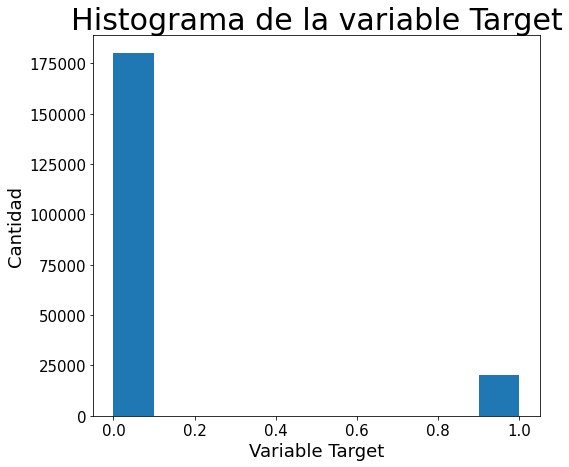

In [23]:
# Creamos un histograma para la variable target

plt.figure(figsize=(8,7))
plt.hist(t)
plt.xlabel('Variable Target', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Histograma de la variable Target", fontsize=30)
plt.show()

<br>

# Análisis general de las demás variables

In [24]:
# Revisamos el tipo de datos que tiene cada columna 
list(df.dtypes)

#========================================================================
# Todos son float salvo la variable target que es integer

[dtype('int64'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float3

In [25]:
# Revisamos si hay valores nulos en todo el dataset

df.isnull().any().value_counts()

#========================================================================
# No hay valores nulos en todo el dataset

False    201
dtype: int64

In [26]:
# Revisamos la correlación entre las variables 
correlation_table= df.corr()
correlation_table


target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.028285  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274   
var_196  0.023608  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880   
var_197 -0.035303 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535   
var_198 -0.053000 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953   
var_199  0.025434  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767   

            var_6     var_7     var_8  ...   var_190   var_191   var_192  \
target   0.066731 -0.003025  0.019584  ...  0.055973  0.047114 -0.042858   
var_0    0.006983  0.002429  0.004962  ...  0.002752  0.000206 -0.005373   
var_1    0.003258  0.001511  0.004098  ...  0.006627  0.003621 -0.002604   
var_2    0.000883 -0.000991  0.002648  ...  0.000197  0.001285 -0.003400   
var_3   -0.000774  0.002500  0.003553  ...  0.000151  0.002445 -0.001530   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.001244  0.001854  0.001396  ...  0.004571  0.000870 -0.004745   
var_196  0.005378  0.001045 -0.003242  ... -0.000847  0.002466 -0.001386   
var_197 -0.003565  0.003466 -0.004583  ... -0.004974  0.000906 -0.000527   
var_198 -0.003025  0.000650  0.002950  ... -0.000153 -0.000067  0.003451   
var_199  0.006096 -0.001457  0.000854  ... -0.000404  0.003595 -0.001239   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
target  -0.017709 -0.022838  0.028285  0.023608 -0.035303 -0.053000  0.025434  
var_0    0.001616 -0.001514  0.002073  0.004386 -0.000753 -0.005776  0.003850  
var_1    0.001153 -0.002557 -0.000785 -0.000377 -0.004157 -0.004861  0.002287  
var_2    0.000549  0.002104 -0.001070  0.003952  0.001078 -0.000877  0.003855  
var_3   -0.001699 -0.001054  0.001206 -0.002800  0.001164 -0.001651  0.000506  
...           ...       ...       ...       ...       ...       ...       ...  
var_195 -0.003143 -0.001201  1.000000  0.002517 -0.004170 -0.000536  0.002042  
var_196 -0.005308 -0.005040  0.002517  1.000000 -0.000454  0.000253  0.000607  
var_197  0.005068  0.000884 -0.004170 -0.000454  1.000000  0.001183  0.004991  
var_198  0.001646  0.003194 -0.000536  0.000253  0.001183  1.000000 -0.004731  
var_199 -0.000552 -0.005615  0.002042  0.000607  0.004991 -0.004731  1.000000  

[201 rows x 201 columns]

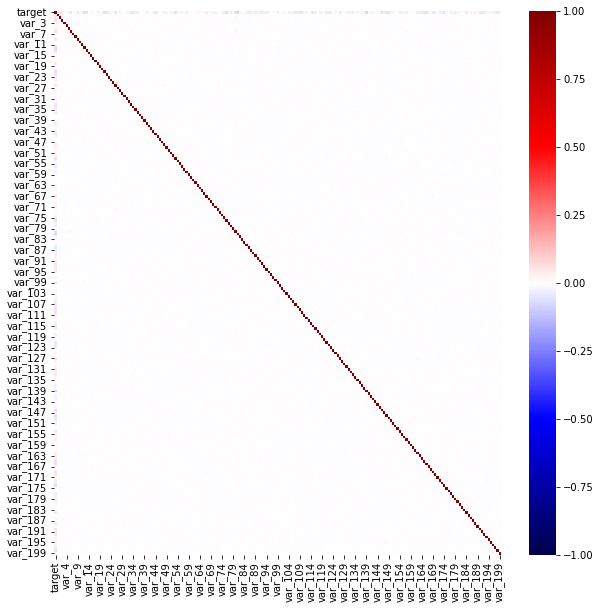

In [27]:
# Utilizamos un gráfico heatmap para visualizar la correlación entre variables

plt.figure(figsize=(10,10))
sns.heatmap(correlation_table, vmin = -1, vmax = 1, cmap = "seismic")
plt.show()

#=====================================================================================================
# No hay correlación entre las variables ya que todos los datos se encuentran cercanos a 0
# Entendemos que esto se debe a que el dataset fue procesado anteriormente.

In [28]:
# Creamos una variable para ver de forma ordenada la correlación de todas las variables con la target. 

correlac_con_target = correlation_table["target"].apply(lambda corr: abs(corr)).sort_values()
correlac_con_target

#=====================================================================================
# Vemos que todas las variables tienen una correlación mínima con la variable target, siendo la varible var_81 la de mayor correlación.


var_185    0.000053
var_27     0.000582
var_30     0.000638
var_17     0.000864
var_38     0.000970
             ...   
var_6      0.066731
var_12     0.069489
var_139    0.074080
var_81     0.080917
target     1.000000
Name: target, Length: 201, dtype: float64

In [29]:
# 10 variables con la mayor correlación con la variable target

mayor_corr = correlac_con_target.nlargest(10)
mayor_corr = mayor_corr.to_dict()
mayor_corr

{'target': 1.0,
 'var_81': 0.08091733225144167,
 'var_139': 0.07407963271455917,
 'var_12': 0.0694892766326826,
 'var_6': 0.06673084520462776,
 'var_110': 0.0642752989888015,
 'var_146': 0.06364388371677732,
 'var_53': 0.06339860914035844,
 'var_26': 0.06242219280095159,
 'var_76': 0.06191746588291698}

In [30]:
# 10 variables con la menor correlación con la variable target

menor_corr= correlac_con_target.nsmallest(10)
menor_corr = menor_corr.to_dict()
menor_corr

{'var_185': 5.311585752689365e-05,
 'var_27': 0.0005818917349485505,
 'var_30': 0.0006379418266000017,
 'var_17': 0.0008637245545774968,
 'var_38': 0.0009697567939633704,
 'var_41': 0.0012975964837112306,
 'var_126': 0.001392929425952153,
 'var_103': 0.0013953514829378709,
 'var_10': 0.0022132548854344,
 'var_100': 0.0022153272208436203}

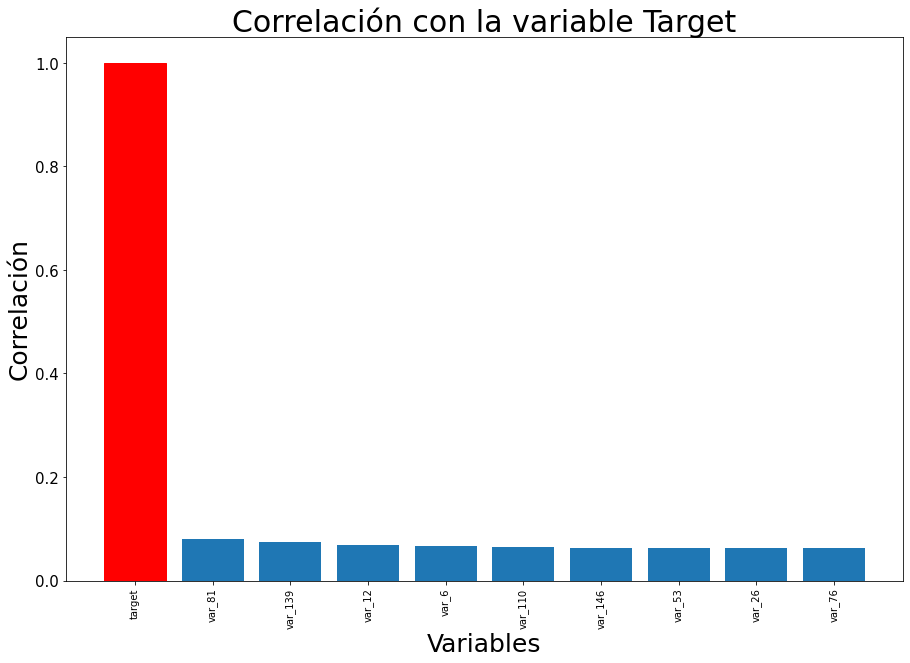

In [31]:
# Gráfico de las variables con mayor correlación con la variable Target

plt.figure(figsize=(15,10))
barlist = plt.bar(mayor_corr.keys(), mayor_corr.values())
barlist[0].set_color('r')

plt.xticks(rotation=90) #Rotamos el nombre del eje x
plt.yticks(fontsize=15)
plt.xlabel("Variables", fontsize=25)
plt.ylabel("Correlación", fontsize=25)
plt.title("Correlación con la variable Target", fontsize=30)
plt.show()

<br>

# Análisis univariado

Como mencionamos anteriormente, no conocemos el nombre de las variables y la correlación entre varibles no existe. Es por ello que el análisis univariado, bivariado y multivariado no resulta relevante para nuestro dataset.

De igual modo, hemos querido incluirlo para esta entrega, por lo que utilizaremos algunas variables que consideramos relevantes para realizar con ellas el análisis univariado, bivariado y multivariado.

## Validación de Outliers a través de Boxplot

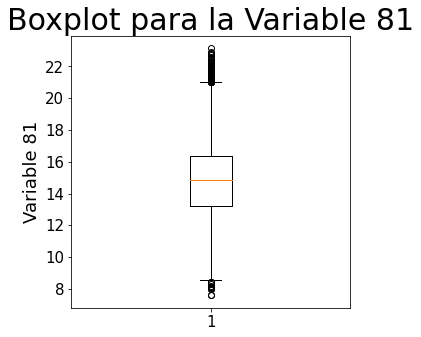

In [32]:
# Boxplot de la variable con mayor correlación con la variable target

plt.figure(figsize=(5,5))
plt.boxplot(df["var_81"])
plt.ylabel('Variable 81', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot para la Variable 81", fontsize=30)
plt.show()

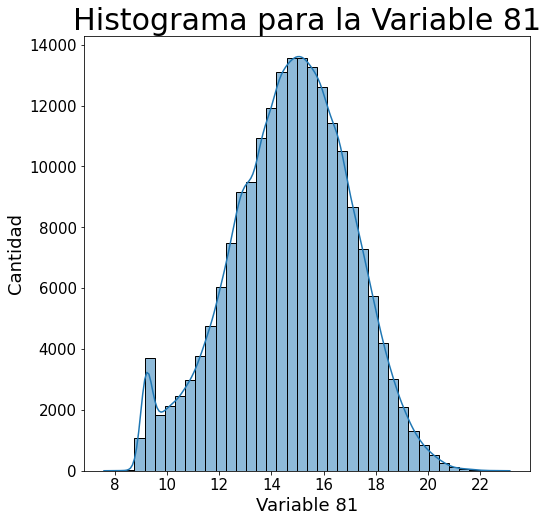

In [33]:
# Histograma de la variable con mayor correlación con la variable target

plt.figure(figsize=(8,8))
sns.histplot(df["var_81"], bins=40, kde=True) 
plt.xlabel('Variable 81', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Histograma para la Variable 81", fontsize=30)
plt.show()

<br>

## Análisis de simetría / Skew

Analizamos la simetría de las variables. 
Buscamos el valor absoluto del skew de forma tal que luego podamos ver los que tienen módulo mayor a 1 (lo que indicaría que la variable es asimétrica). En este caso, no hay variables (que no sean la target) con módulo de skew mayor a 1, por lo que no hay variables asimétricas en este dataset.

In [34]:
skew=df.skew().abs().sort_values()
skew

var_194    0.000096
var_72     0.000853
var_21     0.001675
var_45     0.001727
var_5      0.002038
             ...   
var_179    0.242891
var_2      0.260314
var_168    0.267414
var_44     0.340172
target     2.657642
Length: 201, dtype: float64

In [35]:
# Variables con mayor skew
skew.nlargest(10)

target     2.657642
var_44     0.340172
var_168    0.267414
var_2      0.260314
var_179    0.242891
var_93     0.238090
var_0      0.235639
var_163    0.234780
var_81     0.232526
var_80     0.220236
dtype: float64

In [36]:
# Variables con menor skew
skew.nsmallest(10)

var_194    0.000096
var_72     0.000853
var_21     0.001675
var_45     0.001727
var_5      0.002038
var_32     0.003091
var_136    0.003517
var_3      0.003548
var_182    0.003947
var_88     0.004620
dtype: float64

In [37]:
# Variable más simétrica (con menor skew)
df["var_194"].describe()

count    200000.000000
mean         17.993811
std           3.135113
min           8.694400
25%          15.629800
50%          17.957950
75%          20.396525
max          27.928801
Name: var_194, dtype: float64

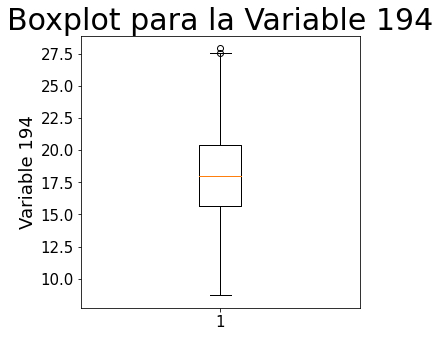

In [38]:
# Boxplot de la variable más simétrica (con menor skew)

# Se puede observar que la mediana está casi en el medio de la caja, por lo que la mediana es muy similar al promedio. 
# (En el describe que realizamos se puede ver que el promedio es de 17.99 y la mediana de 17.96)
# Es una variable con pocos outliers

plt.figure(figsize=(5,5))
plt.boxplot(df["var_194"])
plt.ylabel('Variable 194', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot para la Variable 194", fontsize=30)
plt.show()

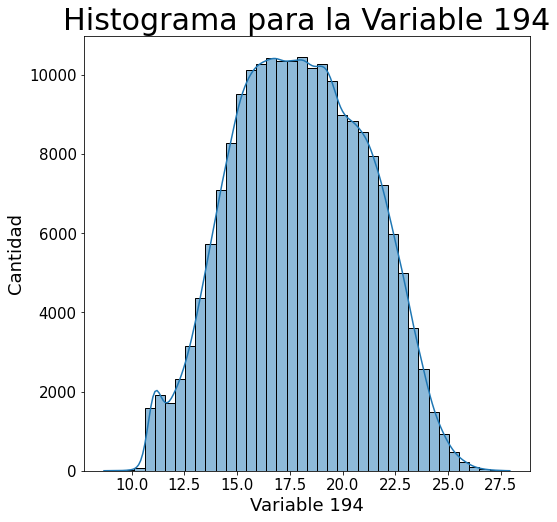

In [39]:
# Histograma de la variable más simétrica (con menor skew)

# Utilizamos seaborn que incluye la curva Kenell Density Estimate
# Se puede observar que la variable es muy simétrica

plt.figure(figsize=(8,8))
sns.histplot(df["var_194"], bins=40, kde=True) 
plt.xlabel('Variable 194', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Histograma para la Variable 194", fontsize=30)
plt.show()

In [40]:
# Variable más asimétrica (con el mayor skew)

df["var_44"].describe()

count    200000.000000
mean          8.948316
std           5.902959
min          -9.939600
25%           5.313650
50%           9.437200
75%          13.087300
max          34.196098
Name: var_44, dtype: float64

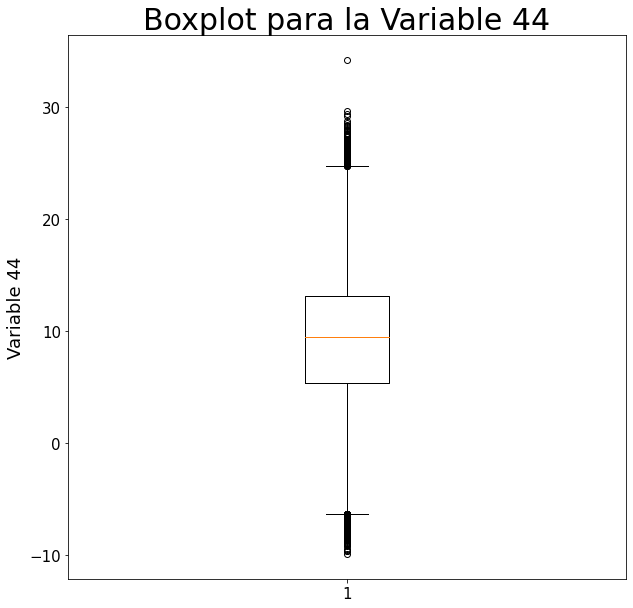

In [41]:
# Boxplot con la variable más asimétrica (con el mayor skew)

# Se puede observar que la mediana se encuentra menos centrada en la caja que en la anterior, por lo que la media y la mediana
# tendrán mayor diferencia. De igual modo, la diferencia no es muy significativa. 
# (En el desctribe que realizamos se puede ver que la media es de 8.95 y la mediana de 9.44)
# En esta variable hay una mayor cantidad de outliers.

plt.figure(figsize=(10,10))
plt.boxplot(df["var_44"])
plt.ylabel('Variable 44', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot para la Variable 44", fontsize=30)
plt.show()

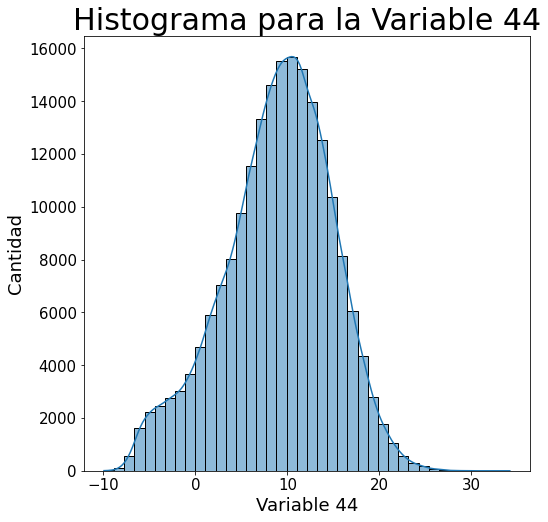

In [42]:
# Histograma de la variable más asimétrica (con el mayor skew)
# Utilizamos seaborn que incluye la curva Kenell Density Estimate

# Se puede observar que la variable es más asimétrica que la anterior, pero de igual modo su asimetría no es significativa para el modelo.

plt.figure(figsize=(8,8))
sns.histplot(df["var_44"], bins=40, kde=True) 
plt.xlabel('Variable 44', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Histograma para la Variable 44", fontsize=30)
plt.show()

<br>

## Análisis intercuartil
Realizamos un análisis intercuartil para todas las variables, de forma tal que podamos detectar cuántos datos outliers tiene el dataset completo.

In [43]:
dft = df.drop(columns=["target"])
dft.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
ID_code                                                                       
train_0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
train_1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
train_2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
train_3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
train_4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

          var_8   var_9  ...  var_190  var_191  var_192  var_193    var_194  \
ID_code                  ...                                                  
train_0 -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699   
train_1  3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   
train_2 -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   
train_3 -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700   
train_4  6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600   

         var_195  var_196  var_197    var_198  var_199  
ID_code                                                 
train_0  -2.3978   7.8784   8.5635  12.780300  -1.0914  
train_1   2.0339   8.1267   8.7889  18.356001   1.9518  
train_2   3.1417  -6.5213   8.2675  14.722200   0.3965  
train_3  -1.2706  -2.9275  10.2922  17.969700  -8.9996  
train_4  -1.5121   3.9267   9.5031  17.997400  -8.8104  

[5 rows x 200 columns]

In [44]:
Q1=dft.quantile(0.25) #Cuartil 25
Q3=dft.quantile(0.75) #Cuartil 75
IQR=Q3-Q1

In [45]:
L_BOUND= Q1-1.5*IQR #límite inferiror
H_BOUND= Q3+1.5*IQR #límite superior

In [46]:
#Generamos lista para iterar

columns=list(dft.columns)
lista=list(range(0,200)) 

In [47]:
#Cálculo los outliers por variable, y sacamos el indice del mayor

outliers=[]
max_value=-1
column=-1
for i in lista:
    a=len(dft[(((df[columns[i]]) < L_BOUND[i])| ((dft[columns[i]]) > H_BOUND[i]))])
    outliers.append(a)
    if max_value<a:
        max_value=a
        column=i

In [48]:
#Ordenamos para ver los mayores valores

outliers.sort(reverse=True)
outliers

[1509,
 1208,
 889,
 804,
 733,
 637,
 589,
 572,
 502,
 498,
 470,
 465,
 461,
 446,
 432,
 413,
 401,
 397,
 397,
 383,
 353,
 331,
 325,
 323,
 313,
 309,
 289,
 286,
 279,
 275,
 268,
 263,
 254,
 254,
 251,
 241,
 239,
 233,
 231,
 228,
 222,
 221,
 198,
 193,
 190,
 188,
 187,
 186,
 178,
 177,
 177,
 176,
 172,
 169,
 163,
 162,
 158,
 154,
 152,
 152,
 150,
 148,
 146,
 145,
 144,
 132,
 131,
 131,
 129,
 128,
 125,
 122,
 113,
 109,
 107,
 104,
 104,
 96,
 96,
 95,
 94,
 92,
 90,
 88,
 85,
 84,
 80,
 80,
 76,
 70,
 68,
 66,
 58,
 56,
 53,
 51,
 49,
 49,
 48,
 47,
 43,
 43,
 42,
 41,
 41,
 40,
 39,
 39,
 38,
 38,
 37,
 36,
 35,
 34,
 34,
 32,
 30,
 30,
 28,
 27,
 27,
 27,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 20,
 19,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 

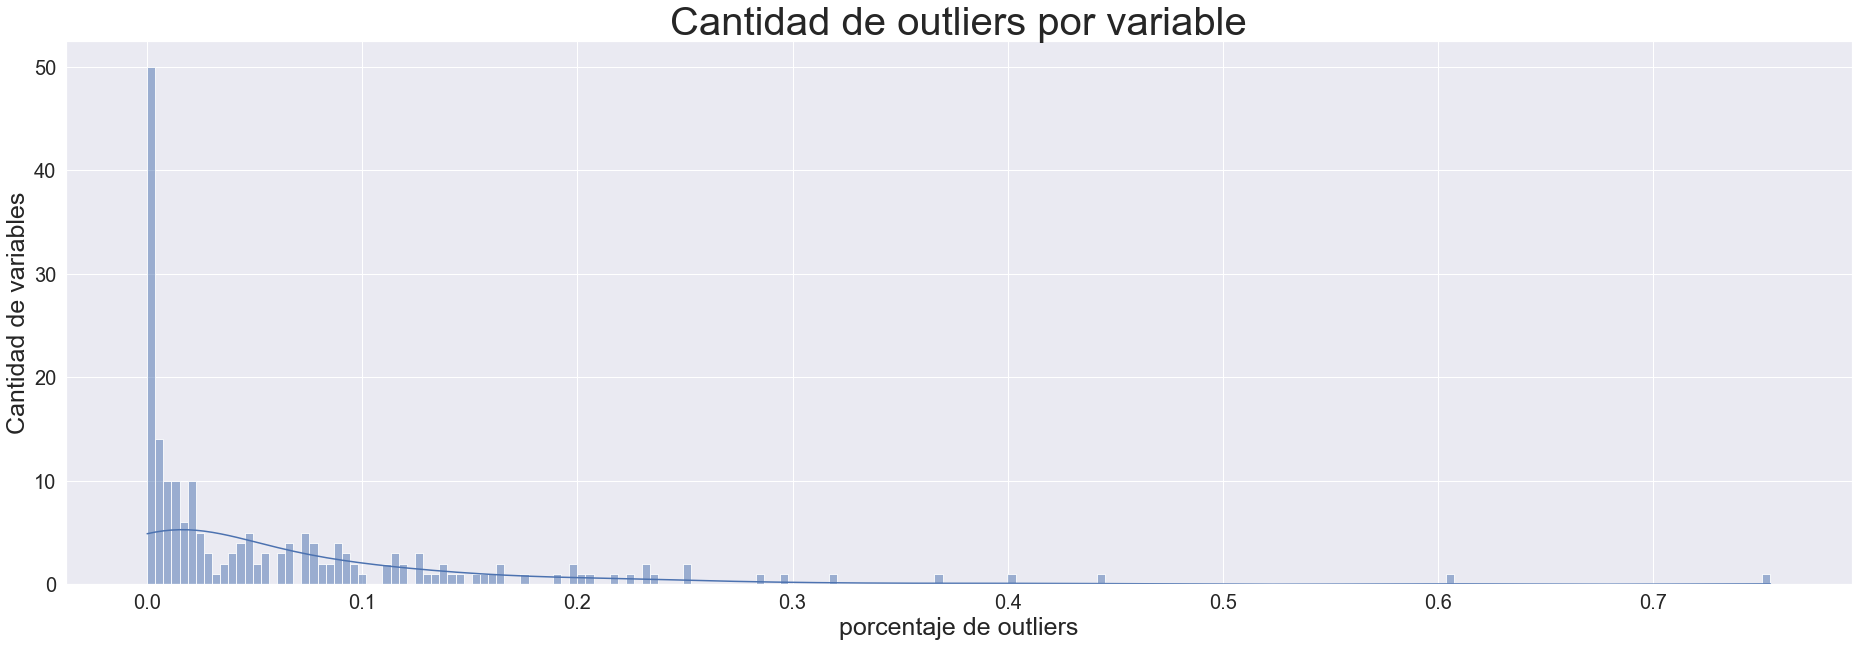

In [49]:
# Cálculo del porcentaje de outliers por variable
per_out=[]
for i in outliers:
    per= i/2000
    per_out.append(per)
plt.figure(figsize=(32,10))
sns.set(font_scale = 1)
sns.histplot(per_out, bins=200, kde=True)
plt.xlabel('porcentaje de outliers', fontsize=25)
plt.ylabel('Cantidad de variables', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Cantidad de outliers por variable", fontsize=40)
plt.show()

In [50]:
#Cantidad de outliers de las 5 variables con más outliers

max5=outliers[0:5]
max5

[1509, 1208, 889, 804, 733]

In [51]:
#5 variables con más outliers

max_0=outliers.index(1509)
max_1=outliers.index(1208)
max_2=outliers.index(889)
max_3=outliers.index(804)
max_4=outliers.index(733)

print(max_0,max_1,max_2,max_3,max_4)

0 1 2 3 4


In [52]:
#Límite superior de 'var_179'

H_BOUND['var_179']

10.03944992274046

In [53]:
#Límite inferior de 'var_179'

L_BOUND['var_179']

-5.0227499678730965

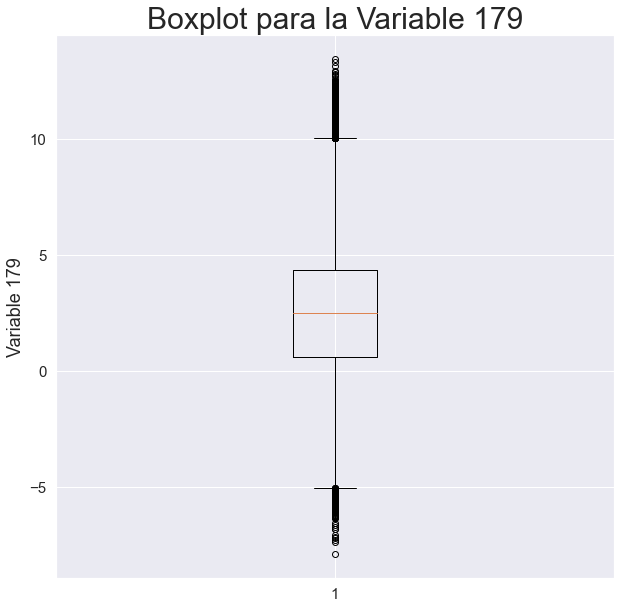

In [54]:
plt.figure(figsize=(10,10))
plt.boxplot(df["var_179"])
plt.ylabel('Variable 179', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot para la Variable 179", fontsize=30)

plt.show()

#Limite superior cercano a 10
#Limite inferior cercano a -5

In [55]:
#Iteramos para hacer la sumatoria de outliers por variable

sumatoria=0
for i in outliers: 
    sumatoria+=i
    
print("La cantidad maxima de outliers puede ser", sumatoria)
    

La cantidad maxima de outliers puede ser 26536


<br>

# Análisis Bivariado

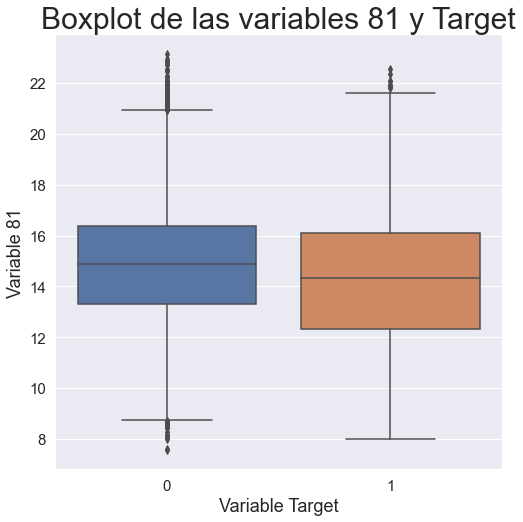

In [56]:
# Gráfoco de caja de la variable 81 (la variable con mayor correlación con la variable target) según la target. 
# Se puede observar que los clientes que no realizan la transacción se encuentran en su mayoría concentrados entre los 
# valores aproximados de 13.5 y 16.2, mientras que los clientes que sí realizaron la transacción se encuentran
# entre los valores aproximados de 12.2 y 16. También se puede observar que hay una mayor variabilidad en los usuarios que 
# no realizaron la transacción, ya que presentan una mayor cantidad de outliers.

plt.figure(figsize=(8,8))
sns.boxplot(x='target', y='var_81', data=df)
plt.xlabel('Variable Target', fontsize=18)
plt.ylabel('Variable 81', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot de las variables 81 y Target", fontsize=30)

plt.show()

C:\Users\Santiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


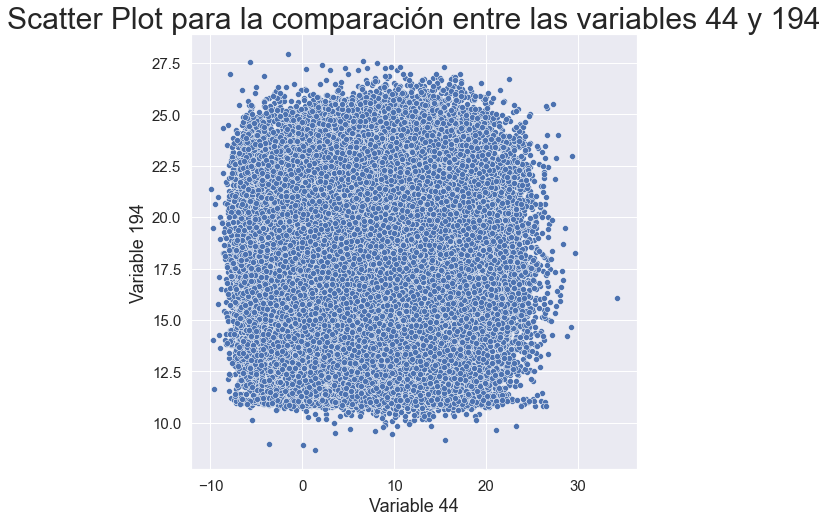

In [57]:
# Scatter Plot para la comparación entre las variables 44 y 194 (que son las variable más y menos asimétricas respectivamente)
# No se observan outliers bidimensionales y la cantidad de outliers de una sola dimensión es pequeña.


plt.figure(figsize=(8,8))
sns.scatterplot(df["var_44"], df["var_194"]) 
plt.xlabel('Variable 44', fontsize=18)
plt.ylabel('Variable 194', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Scatter Plot para la comparación entre las variables 44 y 194", fontsize=30)

plt.show()

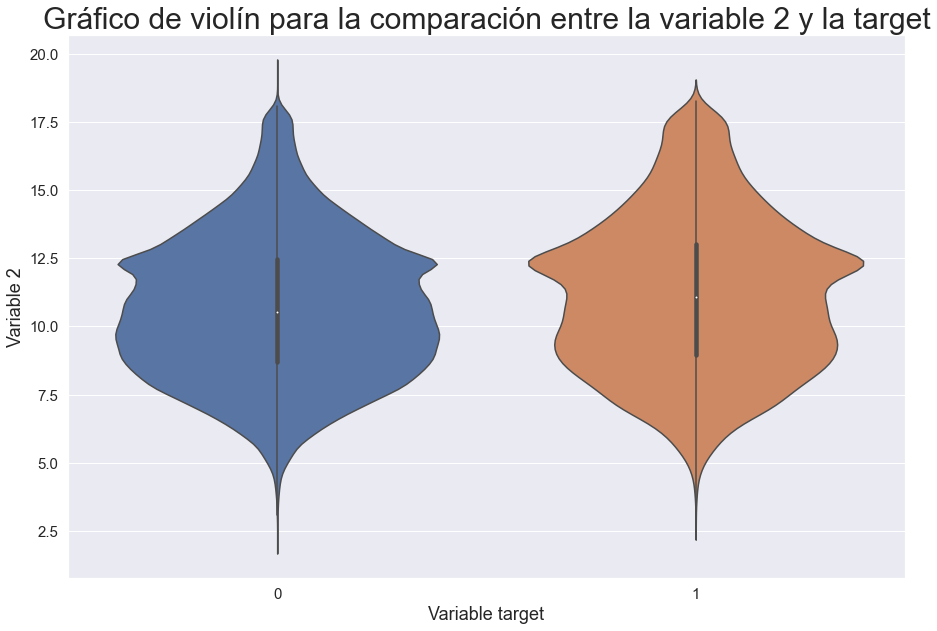

In [58]:
# Gráfico de violín para la comparación entre la variable 2 y la target. (La elección de la variable ha sido aleatoria)

# Ambos violines son muy similares. La mayor probabilidad de encontrar a los clientes es dentro del rango 7.5 a 12.5.
# Sin embargo, hay más probabilidades de encontrar a un usuario que no realice la operación en los valores entre 7.7 y 10.5 que a uno que no realice la operación.
# También se puede observar que hay más probabilidades de encontrar a un usuario que realice la operación entre los valores 12.7 y 17.7 de la variable 2 que a uno que no la realice.

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.violinplot(y = 'var_2', x='target', data= df)
plt.xlabel('Variable target', fontsize=18)
plt.ylabel('Variable 2', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Gráfico de violín para la comparación entre la variable 2 y la target", fontsize=30)

plt.show()

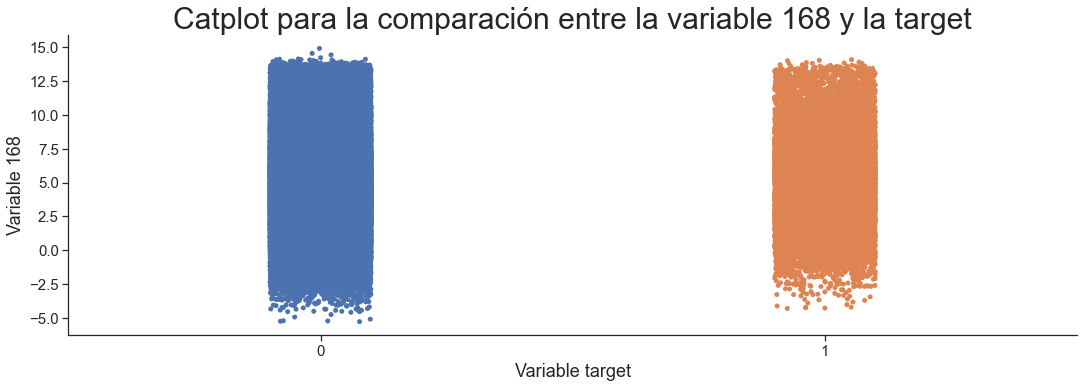

In [59]:
# Catplot para la comparación entre la variable 168 y la target. (La elección de la variable ha sido aleatoria)
# Ambos gráficos son muy similares. Sin embargo, se puede observar que hay mayor variabilidad cuando los clientes
# no realizan la operación, ya que la mayoría de los valores se encuentran entre -3.5 y 13.5; mientras que cuando los clientes
# realizan la operación se encuentran entre -2.5 y 13.

sns.set_theme(style="ticks")

sns.catplot(y="var_168", x="target", data=df, height=5, aspect=3)

plt.xlabel('Variable target', fontsize=18)
plt.ylabel('Variable 168', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Catplot para la comparación entre la variable 168 y la target", fontsize=30)

plt.show()


In [69]:
sns.reset_orig

plt.show()

In [68]:
# Vamos a crear un Pairplot

# Para ello, creamos un subset de columnas para hacer un pairplot y poder comparar las variables entre sí.

df_0a10= df.iloc[:, 2:13]
df_0a10

var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
ID_code                                                                    
train_0      -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
train_1      -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
train_2      -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
train_3      -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
train_4      -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...              ...      ...     ...      ...      ...     ...      ...   
train_199995 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
train_199996 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
train_199997 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
train_199998 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
train_199999 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

               var_8   var_9  var_10   var_11  
ID_code                                        
train_0      -4.9200  5.7470  2.9252   3.1821  
train_1       3.1468  8.0851 -0.4032   8.0585  
train_2      -4.9193  5.9525 -0.3249 -11.2648  
train_3      -5.8609  8.2450  2.3061   2.8102  
train_4       6.2654  7.6784 -9.4458 -12.1419  
...              ...     ...     ...      ...  
train_199995 -0.6209  5.6669  3.7574  -9.5348  
train_199996 -3.6797  6.0019  6.5576 -11.8776  
train_199997  0.1202  6.1629  4.4004  -0.4651  
train_199998 -2.1926  8.7542  1.4245   0.7086  
train_199999 -0.4541  9.3688 -7.3826  -8.7049  

[200000 rows x 11 columns]

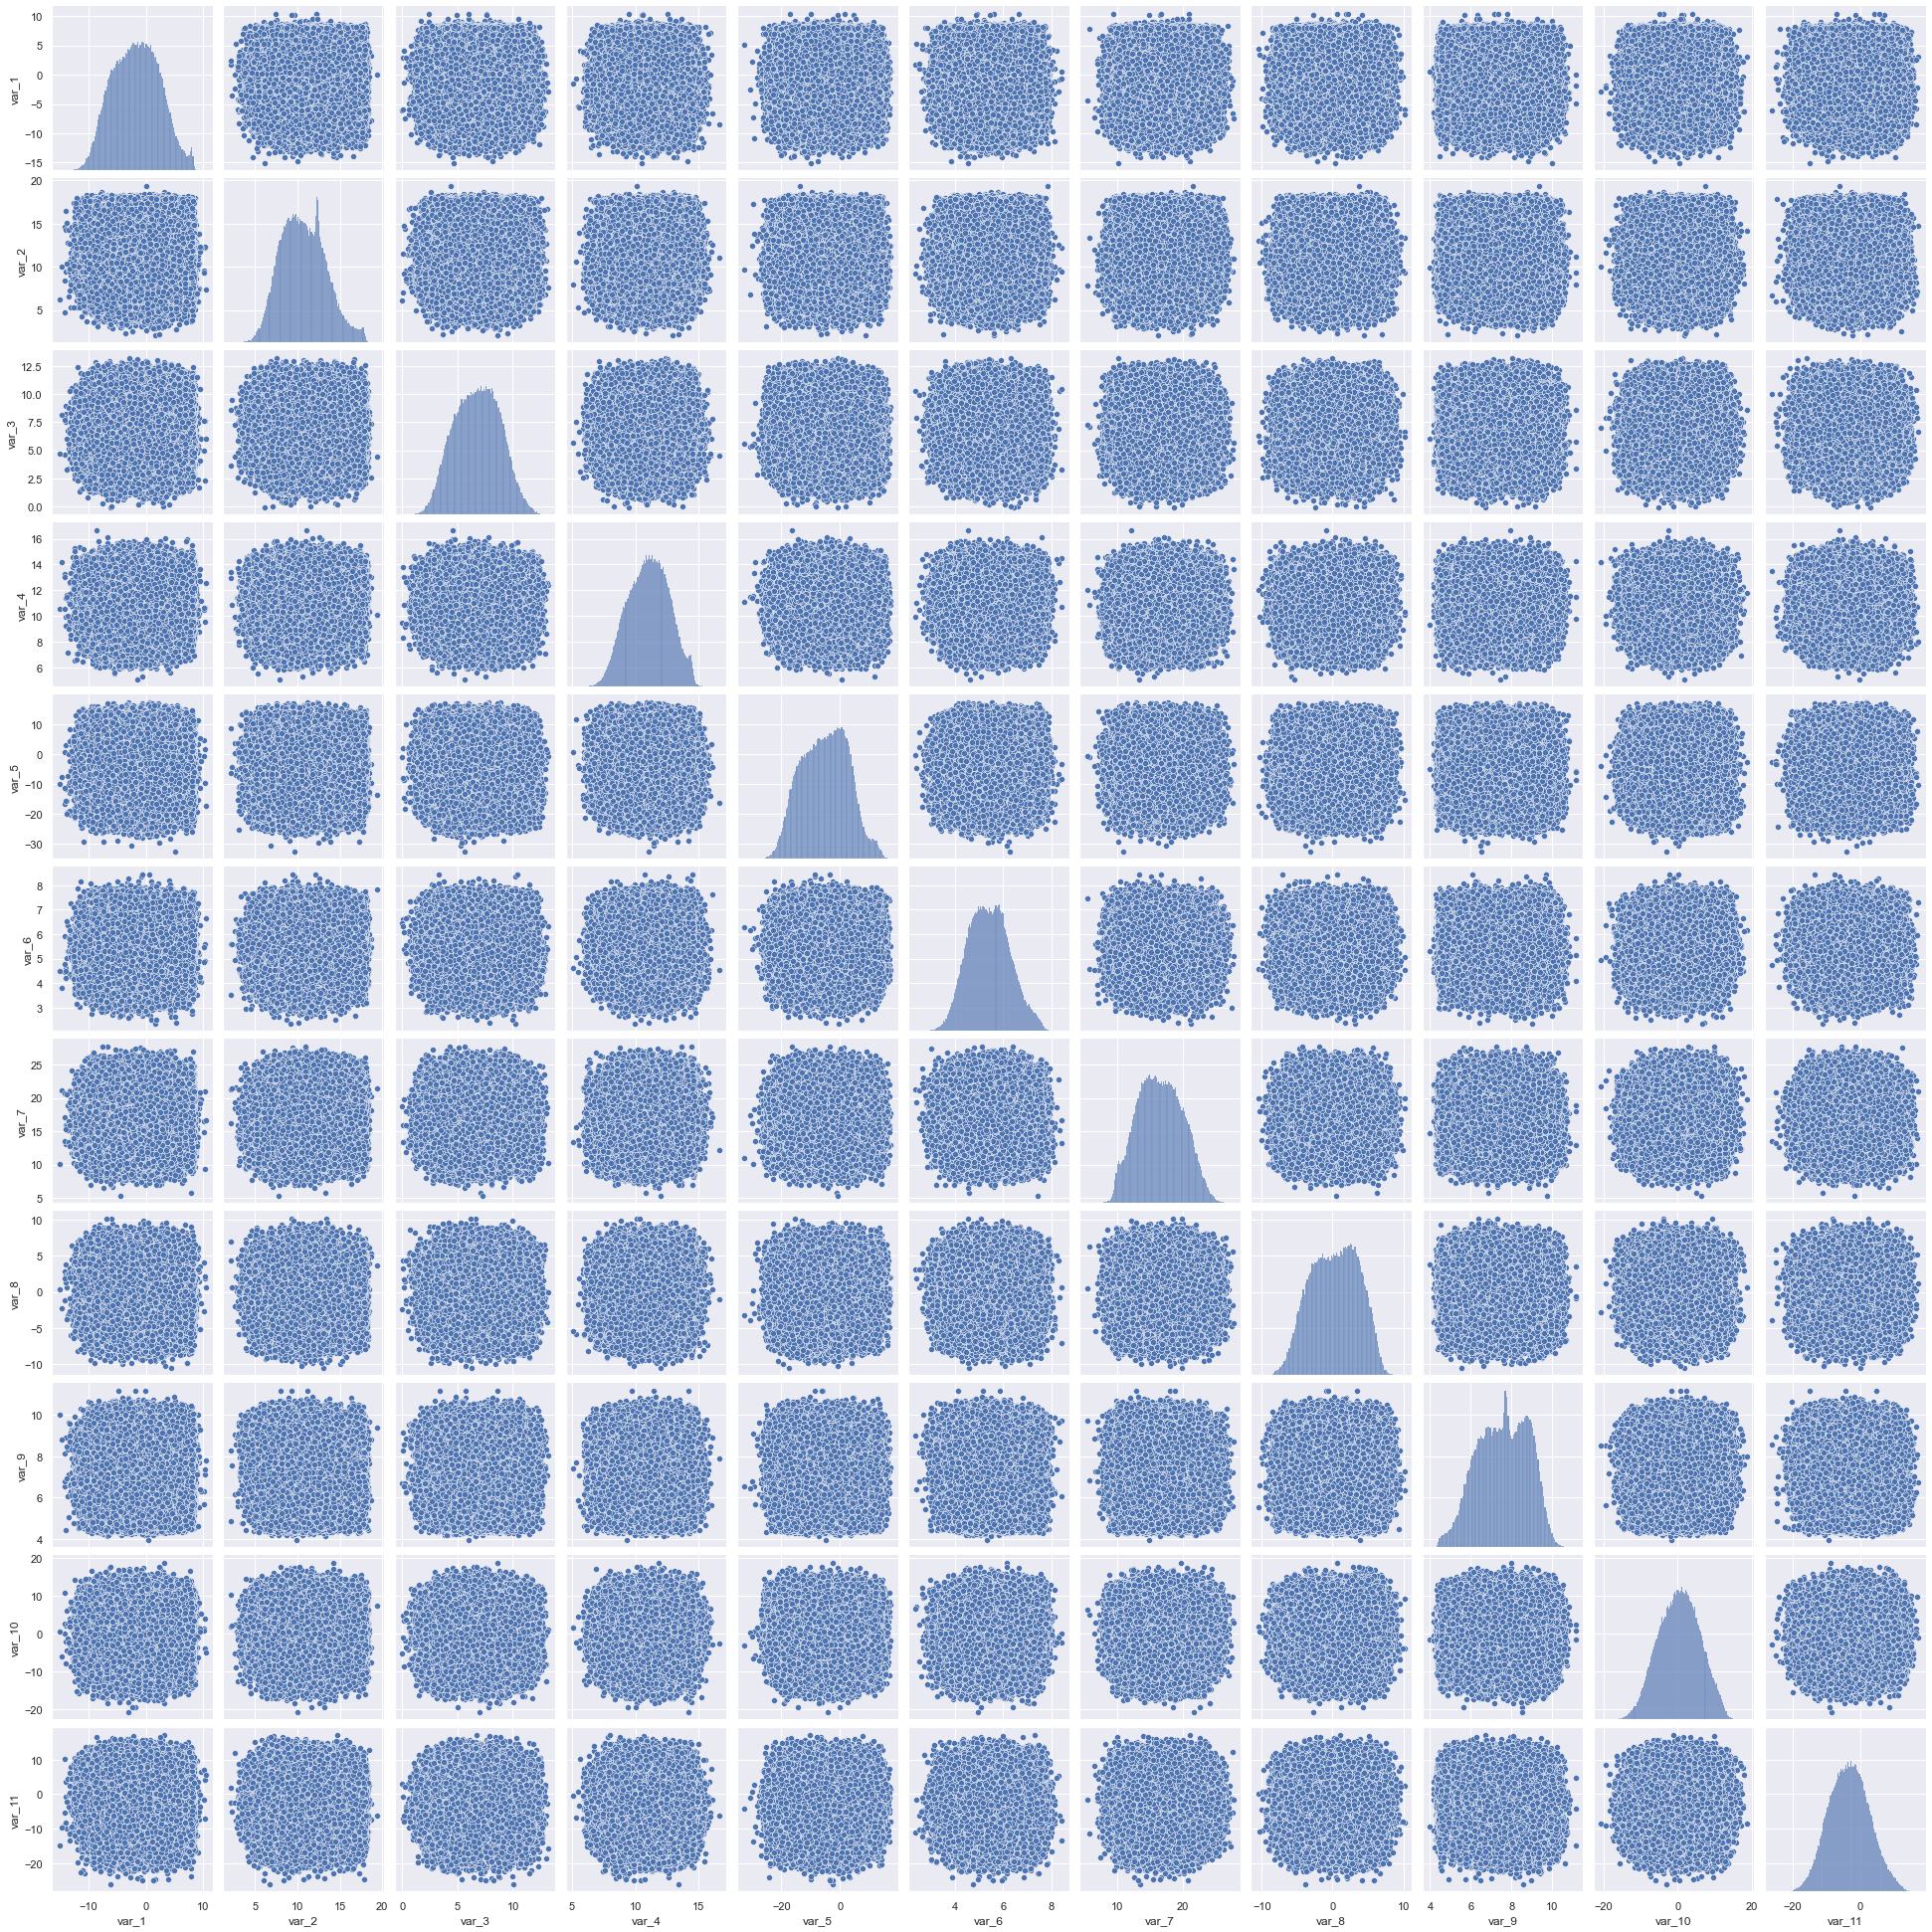

In [67]:
# Graficamos la relación entre las variables para observer correlación entre ellas de manera gráfica

sns.pairplot(df_0a10)
plt.show()
#----------------------------
# Podemos observar que en los gráficos scatter no hay correlación entre las variables 

<br>

# Análisis Multivariado

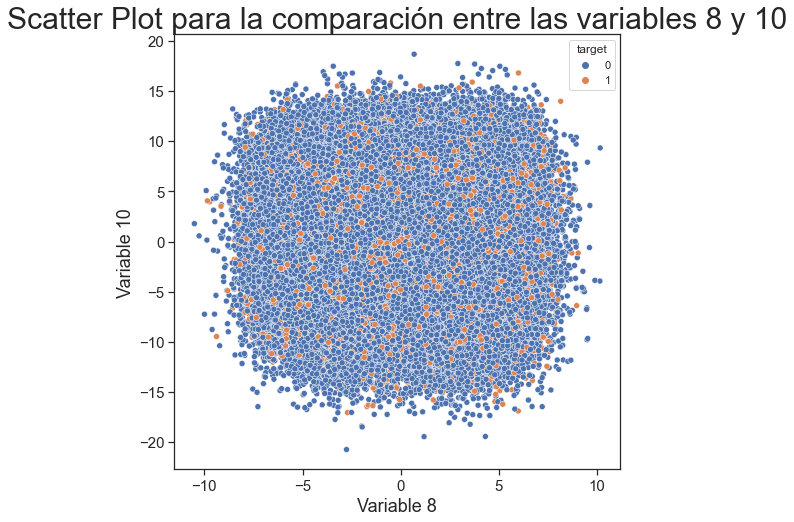

In [61]:
# Scatter Plot para la comparación entre las variables 8 y 10, distinguiéndolos entre los que realizan la operación y los que no.
# No se observan outliers bidimensionales y la cantidad de outliers de una sola dimensión es pequeña.
# No hay correlación entre las variables.



plt.figure(figsize=(8,8))
sns.scatterplot( data =df, x="var_8",y= "var_10", hue="target") 
plt.xlabel('Variable 8', fontsize=18)
plt.ylabel('Variable 10', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Scatter Plot para la comparación entre las variables 8 y 10", fontsize=30)
plt.show()

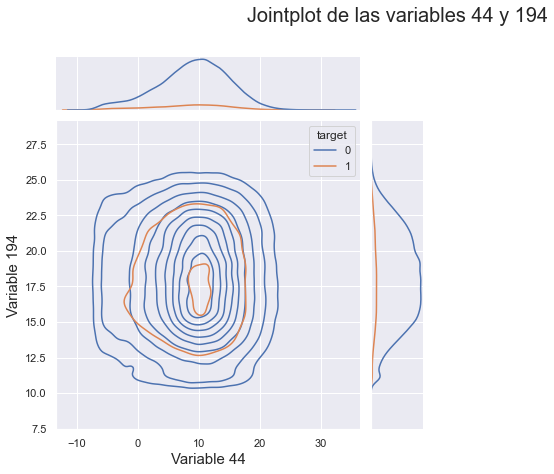

In [62]:
# Jointplot de las variables 44 y 194
#Se puede observar que la mayor cantidad de los usuarios que realizan la operación se encuentra justo en el medio del gráfico.
# Por la cantidad de niveles y por la altura de la curva naranja en los histogramas, se puede ver que la cantidad de los que hacen la operación es considerablemente menor que la de los que no la realizan.
# Los que no la realizan también se encuentran en el centro, pero se pueden encontrar en una zona más amplia.

sns.set(rc={"figure.figsize":(16, 6)}) 
p =sns.jointplot(data=df, x='var_44', y='var_194', hue= 'target', kind= 'kde')
p.set_axis_labels('Variable 44', 'Variable 194', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Jointplot de las variables 44 y 194", y=1.3, fontsize=20)
plt.show()

<br>

# Conclusión
Como se puede observar el dataset se encuentra procesado ya que todos los análisis que se realizaron fueron dentro de los parámetros correctos. Además,  no se pudo descartar ninguno de los variables de forma objetiva debido a que no se tenía referencia a que correspondía cada una de ellas. 
Por tal motivo, se espera realizar un análisis de reducción de variables PCA para luego validarlo con distintos métodos propuestos por el curso dentro de ellos se destaca Precision y Recall.
Una vez realizado dicho análisis se procederá a aplicar varios modelos de ML para obtener predicciones del dataset. 